<a href="https://colab.research.google.com/github/CHOPHILSUN/ChoPhilSun-All-Quest/blob/main/CV_Node10_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B2%AB%EB%B2%88%EC%A7%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 10-2. 프로젝트 1: Image Classification

# 1. VGG16 모델
# VGG16 모델의 Image Classification task에서 자주 사용하는 대표적인 모델입니다.

# 논문: Very Deep Convolutional Networks for Large-Scale Image Recognition
# https://arxiv.org/pdf/1409.1556.pdf

# VGG16 모델의 구조를 아래 이미지를 통해 꼼꼼히 살펴 보세요.

# 2. 코드 살펴보기
# VGG16 모델의 구조를 파악하셨나요? 파악한 VGG16 모델을 코드로 구현해 보는 것이 첫 번째 프로젝트입니다.
# 프로젝트는 크게 2개의 문제로 구성되어 있습니다.

In [ ]:
# 문제 1-1. VGG16 모델 구현하기
# 영상의 내용을 참고하여 직접 코드로 모델을 구현해 보세요.
# Batch Normalization, Parameter Initialization 등을 사용할 수도 있습니다.

# 문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기
# skip connection, pre-trained model 등 다양한 방법을 사용하여 기본적인 VGG16 모델의 성능보다 높은 정확도를 구해보세요.

In [6]:
# 먼저 필요한 라이브러리를 불러오기

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
데이터를 준비합니다. 불러온 데이터는 캐글에서 제공되는 개와 고양이의 데이터로, 이번 프로젝트에서 우리는 개와 고양이를 분류할 예정입니다.
test 데이터에서 1은 개, 0은 고양이를 의미합니다.
여러분들이 원하는 이미지 데이터를 불러 Classification을 해보는 것도 좋을 것 같군요. 😊
"""

In [32]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [9]:
# train 데이터와 validation 데이터에서 개와 고양이 이미지가 저장된 경로를 각각 변수에 저장해 둡니다.

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [11]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [12]:
# train 데이터와 validation 데이터의 개수를 알아봅시다.

num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [14]:
# 필요한 파라미터를 설정해 줍시다. 파라미터를 수정하면 성능을 높일 수 있으니 다양한 실험을 해보세요.

# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [15]:
# 이미지를 확인하기 위해 데이터를 시각화하는 함수를 만들어 봅시다.
# 간단한 함수이기 때문에 자세한 코드 설명은 생략하겠습니다.
# 궁금하다면 구글링을 통해 각 코드가 어떤 역할을 하는지 찾아보세요.

# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:

# train 데이터가 2천장 밖에 되지 않기 때문에 Data Augmentation(데이터 증강)을 통해 데이터의 수를 늘립니다.
# Data Augmentation은 Rescale, Rotation, Random Crop, Zoom, Flip 등 다양한 기법을 사용하여 데이터의 양을 증가시키는 것입니다.
# range의 숫자를 변화시키거나 Flip에서 True/False를 적절하게 사용하여 다양한 실험을 해보세요.


In [16]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [17]:
# .flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결시켜 줍니다.
# 우리는 개와 고양이를 분류하는 task를 수행하기 때문에class_mode는 'binary'입니다.
# Classification task에 따라 class_mode를 변경하시면 됩니다.

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
# Data Augmentation이 제대로 되었는지 확인해 봅시다.

train_data_gen[0][0].shape

(16, 256, 256, 3)

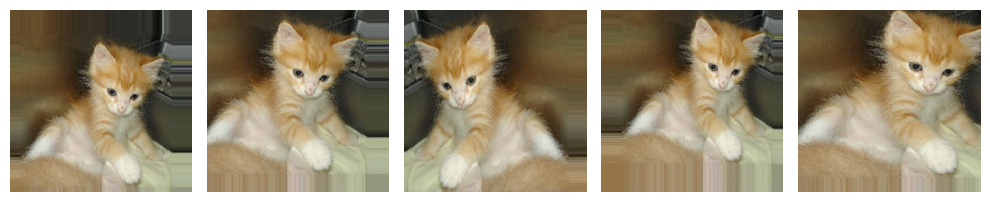

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
# Validation 데이터에도 train 데이터와 같은 동일한 작업을 해 줍니다.
# 그러나 Validation 데이터는 classification이 잘 되는지 평가하는 용도로 사용되기 때문에 데이터의 스케일만 변경해 줍니다.

# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [22]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


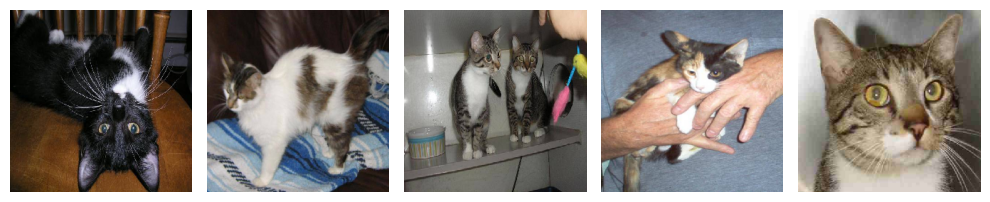

In [23]:
# Validation 데이터를 확인해 봅시다. 크게 이미지와 정답 데이터로 구성이 되어 있습니다.

sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [24]:
_[:5] # 정답 데이터

array([0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 문제 1-1. VGG16 모델 구현하기
# 이제 VGG16 모델을 구현해 볼 시간입니다. 바로 혼자서 모델을 구현하라고 하면 어렵겠죠?
# 그래서 참고할만한 모델 구현 코드를 아래에 적어 보았습니다.
# 실제 VGG16 모델과는 살짝 구조가 다르기 때문에 이미지를 보면서 어느 부분이 다른치 찾아 보는 것도 좋을 것 같습니다.

In [25]:
# 참고 코드

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

# VGG16 모델의 구조를 다시 상기해 보고, 위의 코드를 참고하여 VGG16 모델을 직접 구현해 보세요.
# -> 캡쳐 이미지 삽입 필요

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496 

In [26]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.

import tensorflow as tf

# VGG16 모델 정의
def create_vgg16_model(input_shape=(256, 256, 3), num_classes=1):
    model = tf.keras.Sequential()

    # Block 1
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Block 2
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Block 3
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Flatten
    model.add(tf.keras.layers.Flatten())

    # Dense layers
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(512, activation='relu'))

    # Output layer
    model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))

    return model

# 모델 생성
vgg16_model = create_vgg16_model()
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_3 (Bat  (None, 256, 256, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 128)     1

In [28]:
# 손실함수, optimizer, metric을 설정해 줍니다.
#손실함수와 metric은 분류 task에 따라 다양하게 바꿀 수 있습니다.
# optimizer도 Adam 외에 다양한 것을 사용할 수 있습니다. 자유롭게 바꿔보세요.

loss_function = tf.keras.losses.binary_crossentropy
optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
metric = tf.keras.metrics.binary_accuracy

# 정의한 모델 객체의 이름을 사용합니다.
vgg16_model.compile(loss=loss_function,
                    optimizer=optimize,
                    metrics=[metric])


# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [ ]:
# 모델 학습을 시켜봅시다.
# data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다.
# batch가 끝없이 생성되기 때문에, 한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다.
# 만약 batch_size=20이고 steps_per_epoch=100일 경우 (데이터, 라벨)의 쌍 20개가 생성되고, 크기가 20인 batch 데이터를 100번 학습하면 epoch이 완료됩니다.
# 단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다.
# 일반적으로 (전체 데이터 길이/batch_size)를 steps_per_epoch으로 설정합니다.


In [30]:
loss_function = tf.keras.losses.binary_crossentropy
optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
metric = tf.keras.metrics.binary_accuracy

# 정의한 모델 객체의 이름을 사용합니다.
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# 이제 모델을 훈련할 수 있습니다.
history = model.fit(
    train_data_gen,
    steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_freq=1)


Epoch 1/5
125/125 [==============================] - 1523s 12s/step - loss: 40.0101 - binary_accuracy: 0.4855 - val_loss: 0.6923 - val_binary_accuracy: 0.5030
Epoch 2/5
125/125 [==============================] - 1579s 13s/step - loss: 0.7123 - binary_accuracy: 0.4945 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 1581s 13s/step - loss: 0.6942 - binary_accuracy: 0.4960 - val_loss: 0.6920 - val_binary_accuracy: 0.5010
Epoch 4/5
125/125 [==============================] - 1405s 11s/step - loss: 0.6929 - binary_accuracy: 0.4890 - val_loss: 0.6921 - val_binary_accuracy: 0.5010
Epoch 5/5
125/125 [==============================] - 1489s 12s/step - loss: 0.7069 - binary_accuracy: 0.4900 - val_loss: 0.6922 - val_binary_accuracy: 0.5000


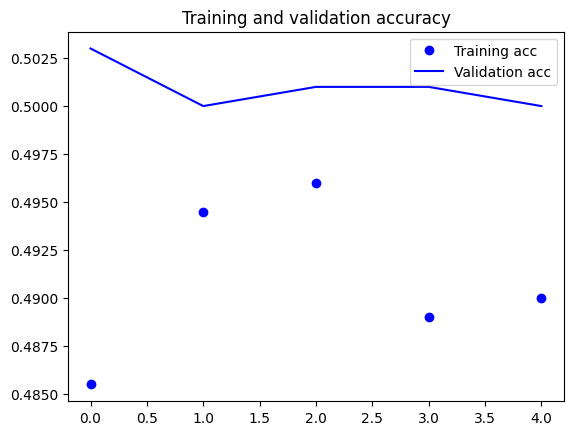

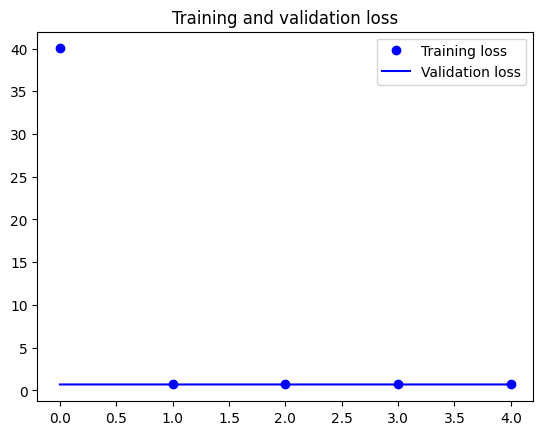

In [31]:
# 학습이 되었다면 시각화를 통해 정확도를 알아봅시다.

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 10-3. 프로젝트 2: Object Detection

#1. Faster RCNN

''' RCNN vs Fast R-CNN vs Faster R-CNN
2 stage detector(Region Proposal, Classification/Bounding Box Regression)
content img
[RCNN, Fast RCNN, Faster RCNN 비교]
https://wikidocs.net/148634 '''

'''

Faster RCNN의 구조
RCNN, Fast RCNN과 Faster RCNN의 가장 큰 차이점은 Selective Search를 Region Proposal Network(RPN) 로 바꾸었다는 것입니다.

RPN은 RoI가 될 후보군인 Anchor Box를 무수히 만듭니다. 그 후 Bounding Box Regression를 통해서 괜찮은 RoI를 딥러닝을 통해 학습하고 Classification을 통해 그것이 Object인지 아닌지를 판단합니다.

RPN을 통해 얻은 결과에 Object Classification을 통해서 해당 RoI에 있는 Object가 어떤 Class인지 구분하고, Bounding Box Regression을 실행합니다.

content img
[Faster RCNN의 구조]
https://towardsdatascience.com/faster-r-cnn-for-object-detection-a-technical-summary-474c5b857b46

'''

In [33]:
# 코드 살펴보기
# 해당 코드는 텐서플로우 공식 홈페이지의 튜토리얼에서 제시된 코드를 활용했습니다.
# 먼저 필요한 라이브러리를 불러옵니다.

!pip3 install tensorflow-estimator==2.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.9/462.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires tensorflow-estimator<2.15,>=2.14.0, but you have tensorflow-estimator 2.6.0 which is incompatible.


In [35]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

ImportError: ignored

In [36]:
# 이미지를 시각화하는 함수를 만들어 둡니다.

def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [37]:
# 원하는 이미지를 다운로드하고 정해진 가로, 세로 길이에 맞게 이미지를 resizing하는 함수를 만들어둡니다.

def download_and_resize_image(url, new_width=256, new_height=256, display=False):

  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [38]:
# Bounding Box를 만드는 함수를 만듭니다.

def draw_bounding_box_on_image(image,
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]

  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height

  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [39]:
# 이미지 위에 class 이름과 score를 나타내는 함수도 만듭니다.

# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [ ]:
# 이미지를 불러옵니다.

# 원하는 이미지를 불러오고, 가로와 세로를 변경해 보는 실험을 진행해 보세요.

In [49]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.


NameError: ignored

In [50]:
tfhub에서 사전 학습된(Pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델을 불러옵니다.

module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

SyntaxError: ignored

In [51]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [52]:
# Detector를 실행하는 함수를 만듭니다.

def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

In [55]:
# detector를 실행시켜 봅시다.

run_detector(detector, downloaded_image_path)

NameError: ignored

In [54]:
# 2-1. 다른 이미지 테스트해보기
# 원하는 이미지를 불러와 결과를 확인해 봅시다.

# 이미지 불러오기

image_path = "/path/to/your/image.jpg"  # 경로를 실제 이미지 파일의 경로로 변경 필요
run_detector(detector, image_path)

NameError: ignored

In [56]:
# 테스트

# 예를 들어, 2번째 모델의 성능을 평가하는 코드를 작성해보겠습니다.
# 이 코드는 실제로 사용하고자 하는 모델에 따라 다를 수 있습니다.

# 테스트 데이터셋 로드 및 전처리 (예시)
test_data_gen = ...  # 테스트 데이터셋 생성

# 모델 평가
test_loss, test_accuracy = model.evaluate(test_data_gen)

# 결과 출력
print(f"테스트 손실: {test_loss}")
print(f"테스트 정확도: {test_accuracy}")

ValueError: ignored

In [ ]:
# 문제 2-2. 다양한 pre-trained model 테스트해보기

# Faster RCNN 외에도 Object Detection을 할 수 있는 다양한 사전 학습 모델이 있습니다.
# tfhub을 탐색하여 사용할 수 있는 1개 이상의 모델을 불러와 결과를 테스트해보고, 그 결과를 비교해 보세요.

In [57]:
# 문제 2-2. 모델 불러오기

# 테스트
# 테스트하고 싶은 이미지의 URL을 넣어주세요.
test_image_url = "https://example.com/your-test-image.jpg"

# 이미지 다운로드 및 테스트
downloaded_test_image_path = download_and_resize_image(test_image_url, 1280, 856, True)
run_detector(detector, downloaded_test_image_path)

NameError: ignored

In [58]:
# 문제 2-2. 테스트

# 테스트하고 싶은 이미지의 URL을 넣어주세요.
test_image_url_2 = "https://example.com/your-test-image-2.jpg"

# 이미지 다운로드 및 테스트
downloaded_test_image_path_2 = download_and_resize_image(test_image_url_2, 1280, 856, True)
run_detector(detector, downloaded_test_image_path_2)

NameError: ignored

In [59]:
# 문제 2-2. 결과 비교
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.")
print("2번째 모델인 [YOUR MODEL NAME]은 ...")  # 여기에 2번째 모델의 성능에 대한 특징을 추가가 필요함.


1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.
2번째 모델인 [YOUR MODEL NAME]은 ...
